# EXPLORATORY DATA ANALYSIS OF UNEMPLOYMENT IN INDIA


### This analysis aims to uncover the patterns and relationships within the data to understand the unemployment rate (which is a percentage of the unemployed to the total labour force) across India and aid informed decision making.


In [2]:
#importing librarieS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading my csv file into a datafram
df= pd.read_csv('Unemployment in India.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,"11,999,139",43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,"11,755,881",42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,"12,086,707",43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,"12,285,693",43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,"12,256,762",44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,"10,871,168",44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,"10,806,105",43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,"9,299,466",41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,"9,240,903",40.67,Urban


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4     Estimated Employed                      740 non-null    object 
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(2), object(5)
memory usage: 41.4+ KB


In [5]:
# descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,11.787946,10.721298,0.00,4.6575,8.35,15.8875,76.74
Estimated Labour Participation Rate (%),740.0,42.630122,8.111094,13.33,38.0625,41.16,45.5050,72.57


# OBSERVATIONS
##### 1. Two major parameters are being analysed. Estimated unemploymennt rate (which is calaculated by as a percentage of the total number of the unemployed divided by the total labour force) and the Estimated labour participation rate ( calculated as a percentage of the the labour force divided by the total working-age population. The working age population refers to people aged 15 to 64).
##### 2. Unemployment rate stood minimally at 0% and maximally at 76.74% while the estimated labour participation rate ranged from 13.33% to 72.57%
##### 3. The dataset covered a period of May 2019 to June 2020. The average unemployment rate is 11.79% while the average labour participation rate is 42.63%.

In [37]:
correlation_matrix=df.corr(numeric_only = True)
# the rate of unemployment does not correllate to the estimated labour force.

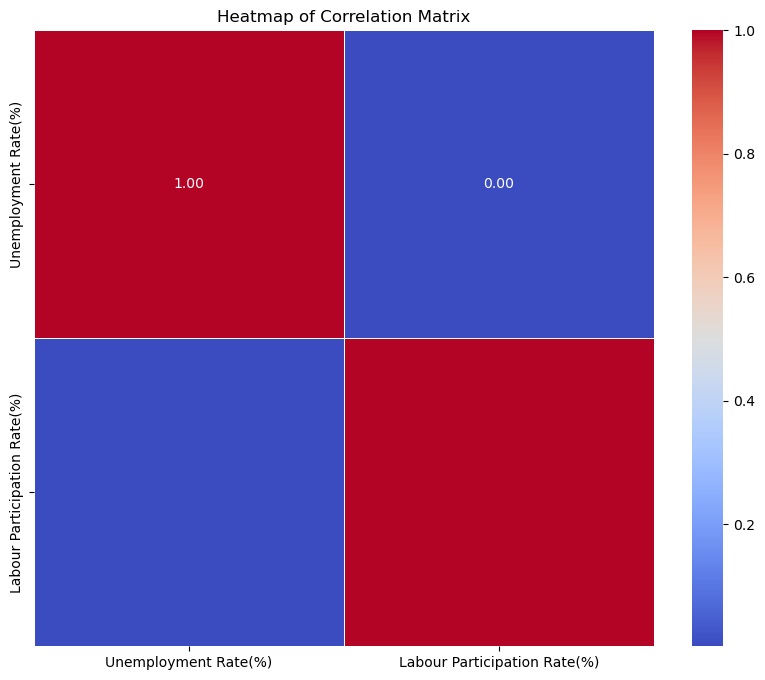

In [38]:
 #Visualizing using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [5]:
# checking for duplicates
df.duplicated().sum()

13

##### Dataset has 13 duplicates that needs to be removed as shown below

In [7]:
# Drop duplicate rows
data_cleaned = df.drop_duplicates()

In [8]:
# Save the cleaned data to a new CSV file 
data_cleaned.to_csv('cleaned_data.csv', index=False)
df=data_cleaned

In [9]:
# confirming missing values
df.isnull().sum()

Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
  Estimated Employed                        1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64

##### Dataset has one missing value from each of the column, this will aslo be deleted

In [13]:
# removing missing values
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4     Estimated Employed                      740 non-null    object 
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(2), object(5)
memory usage: 46.2+ KB


In [15]:
# confirming missing values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
  Estimated Employed                        0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [24]:
# Print original column names
print("Original column names:")
print(df.columns)

Original column names:
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       '  Estimated Employed ', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [124]:
# Define a dictionary to rename columns
new_column_names = {
    'Region': 'Region',
    ' Date': 'Date',
    ' Frequency': 'Frequency',
    ' Estimated Unemployment Rate (%)': 'Unemployment Rate(%)',
    ' Estimated Employed': 'EstimatedEmployed',
    ' Estimated Labour Participation Rate (%)': 'Labour Participation Rate(%)',
    'Area': 'Area'
}

In [125]:
# Rename columns
df.rename(columns=new_column_names, inplace=True)

In [126]:
# Print new column names to verify changes
print("\nNew column names:")
print(df.columns)


New column names:
Index(['Region', 'Date', 'Frequency', 'Unemployment Rate(%)',
       '  Estimated Employed ', 'Labour Participation Rate(%)', 'Area',
       'Month', 'Year'],
      dtype='object')


### Top 5 Region with highest unemployement rate

In [29]:
highest_UER =df['Unemployment Rate(%)'].groupby(by=df['Region']).mean().sort_values(ascending = False).reset_index()[0:5]
highest_UER

,Region,Unemployment Rate(%)
0,Tripura,28.350357
1,Haryana,26.283214
2,Jharkhand,20.585000
3,Bihar,18.918214
4,Himachal Pradesh,18.540357


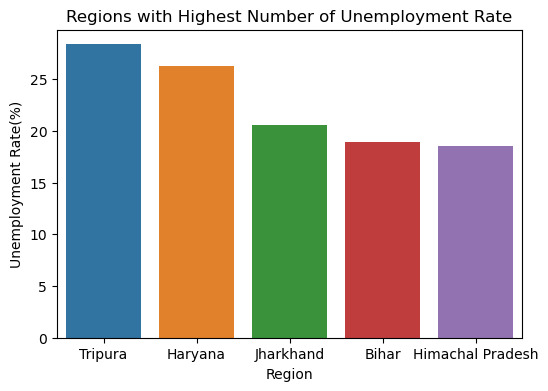

In [32]:
 #Visualizing using Seaborn
plt.figure(figsize =(6,4))
sns.barplot(x='Region',y='Unemployment Rate(%)',data =highest_UER)
plt.title('Regions with Highest Number of Unemployment Rate')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate(%)')
plt.show()

### Top 5 Region with highest Labour Participation  rate

In [66]:
highest_LBR = df['Labour Participation Rate(%)'].groupby(by=df['Region']).mean().sort_values(ascending = False).reset_index()[0:5]
highest_LBR

,Region,Labour Participation Rate(%)
0,Tripura,61.823929
1,Meghalaya,57.080741
2,Telangana,53.002500
3,Gujarat,46.101071
4,Sikkim,46.070000


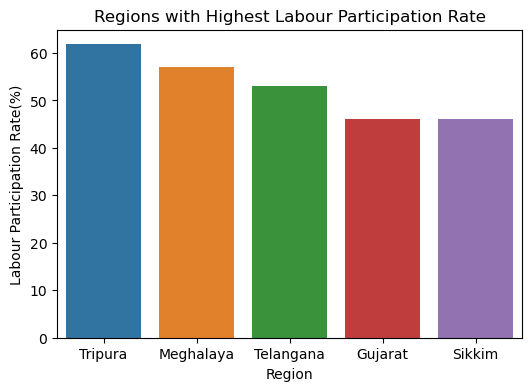

In [67]:
 #Visualizing using Seaborn
plt.figure(figsize =(6,4))
sns.barplot(x='Region',y='Labour Participation Rate(%)',data =highest_LBR)
plt.title('Regions with Highest Labour Participation Rate')
plt.xlabel('Region')
plt.ylabel('Labour Participation Rate(%)')
plt.show()

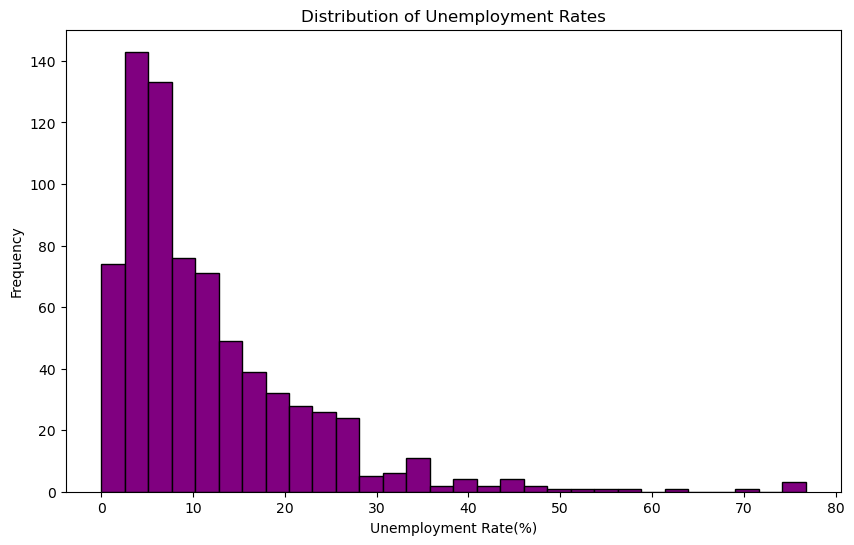

In [68]:
# Distribution of Unemployment Rate
plt.figure(figsize=(10, 6))
df['Unemployment Rate(%)'].plot(kind='hist', bins=30, color='purple', edgecolor='black')
plt.xlabel('Unemployment Rate(%)')
plt.ylabel('Frequency')
plt.title('Distribution of Unemployment Rates')
plt.show()

In [78]:
# Strip any leading or trailing whitespace from the 'Date' column
df['Date'] = df['Date'].str.strip()

In [79]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [106]:
# Extract month from 'Date' column
df['Month'] = df['Date'].dt.month_name()

In [116]:
df.head()

,Region,Date,Frequency,Unemployment Rate(%),Estimated Employed,Labour Participation Rate(%),Area,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,"11,999,139",43.24,Rural,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,"11,755,881",42.05,Rural,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,"12,086,707",43.50,Rural,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,"12,285,693",43.97,Rural,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,"12,256,762",44.68,Rural,September,2019


In [108]:
# Average Unemployment Rate by Area
highest_URA = df['Unemployment Rate(%)'].groupby(by=df['Area']).mean().sort_values(ascending = False)
highest_URA

Area
Urban    13.166614
Rural    10.324791
Name: Unemployment Rate(%), dtype: float64

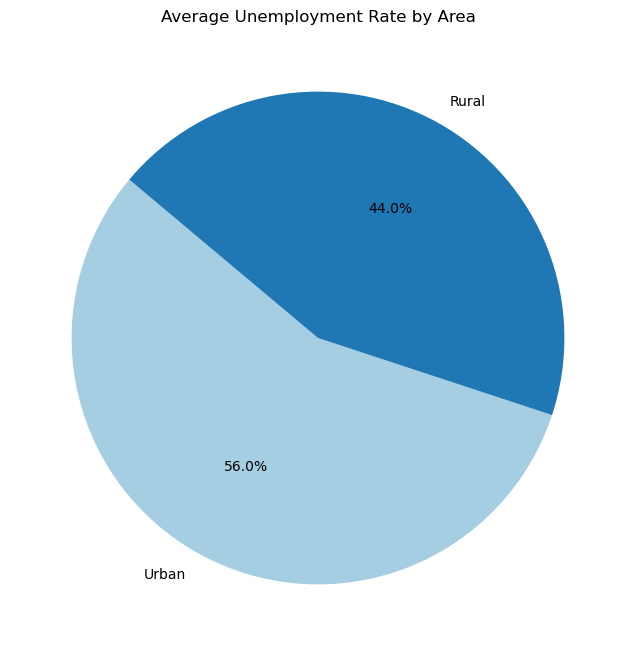

In [109]:
# Visualizing Using Pandas
plt.figure(figsize=(10, 8))
highest_URA.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(highest_URA))))
plt.title('Average Unemployment Rate by Area')
plt.ylabel('')  # Hide y-label
plt.show()

### unemployment rate is higher in the urban areas possibly due to rural urban migration, more young individuals move from rural areas to urban areas in search of greener pastures leading to a high influx into urban areas.

In [112]:
# Average Unemployment Rate by Month
highest_URM = df['Unemployment Rate(%)'].groupby(by=df['Month']).mean().sort_values(ascending = False)
highest_URM

Month
April        23.641569
May          16.646190
March        10.700577
June         10.553462
February      9.964717
January       9.950755
October       9.900909
November      9.868364
August        9.637925
December      9.497358
September     9.051731
July          9.033889
Name: Unemployment Rate(%), dtype: float64

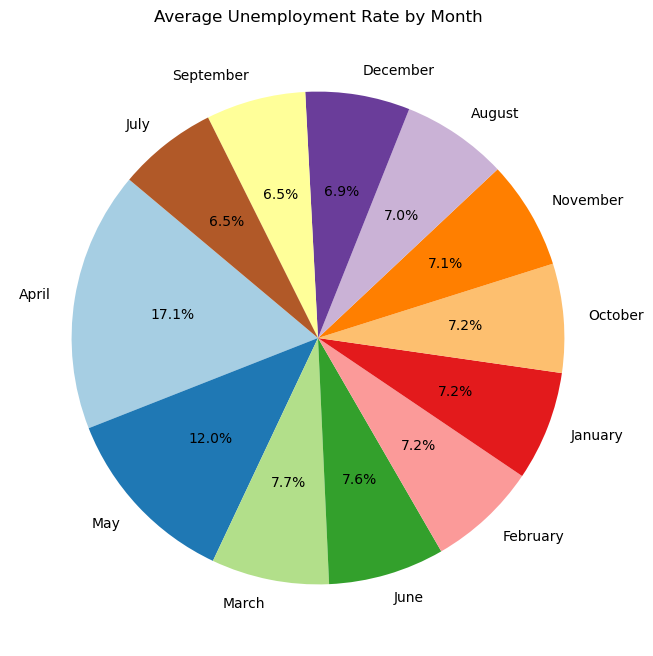

In [111]:
#Visualizing Using Pandas
plt.figure(figsize=(10, 8))
highest_URM.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(highest_URM))))
plt.title('Average Unemployment Rate by Month')
plt.ylabel('')  # Hide y-label
plt.show()

### Unemployement rate is highest in the month of April and lowest in July. there is a sharp increase in the average unemployment rate in April, form 10.70% in March to 23.64% afterwards a decline was experienced gradually.

# Estimated Number of Employee By Region

In [128]:
df.head()

,Region,Date,Frequency,Unemployment Rate(%),Estimated Employed,Labour Participation Rate(%),Area,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,"11,999,139",43.24,Rural,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,"11,755,881",42.05,Rural,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,"12,086,707",43.50,Rural,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,"12,285,693",43.97,Rural,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,"12,256,762",44.68,Rural,September,2019


In [138]:
# Print the column names to check for correct names
print("Original columns:", df.columns)

Original columns: Index(['Region', 'Date', 'Frequency', 'Unemployment Rate(%)',
       '  Estimated Employed ', 'Labour Participation Rate(%)', 'Area',
       'Month', 'Year'],
      dtype='object')


In [139]:
# Convert 'Estimated Employed' column to numeric type (remove commas first)
df['  Estimated Employed '] = df['  Estimated Employed '].str.replace(',', '').astype(int)

In [146]:
# Calculate the sum of estimated employees per region
employees_per_region = df.groupby('Region')['  Estimated Employed '].sum()
employees_per_region

Region
Andhra Pradesh      228314609
Assam               139224076
Bihar               346253296
Chandigarh            3801975
Chhattisgarh        120497960
Delhi                73570360
Goa                   5431400
Gujarat             319256358
Haryana              99598029
Himachal Pradesh     29675064
Jammu & Kashmir      37798565
Jharkhand           125138732
Karnataka           298679340
Kerala              123925186
Madhya Pradesh      311233561
Maharashtra         559725484
Meghalaya            18622894
Odisha              183280915
Puducherry            5519230
Punjab              127102136
Rajasthan           281149813
Sikkim                1816972
Tamil Nadu          343547309
Telangana           222310557
Tripura              20076074
Uttar Pradesh       786655301
Uttarakhand          37536159
West Bengal         481559064
Name:   Estimated Employed , dtype: int32

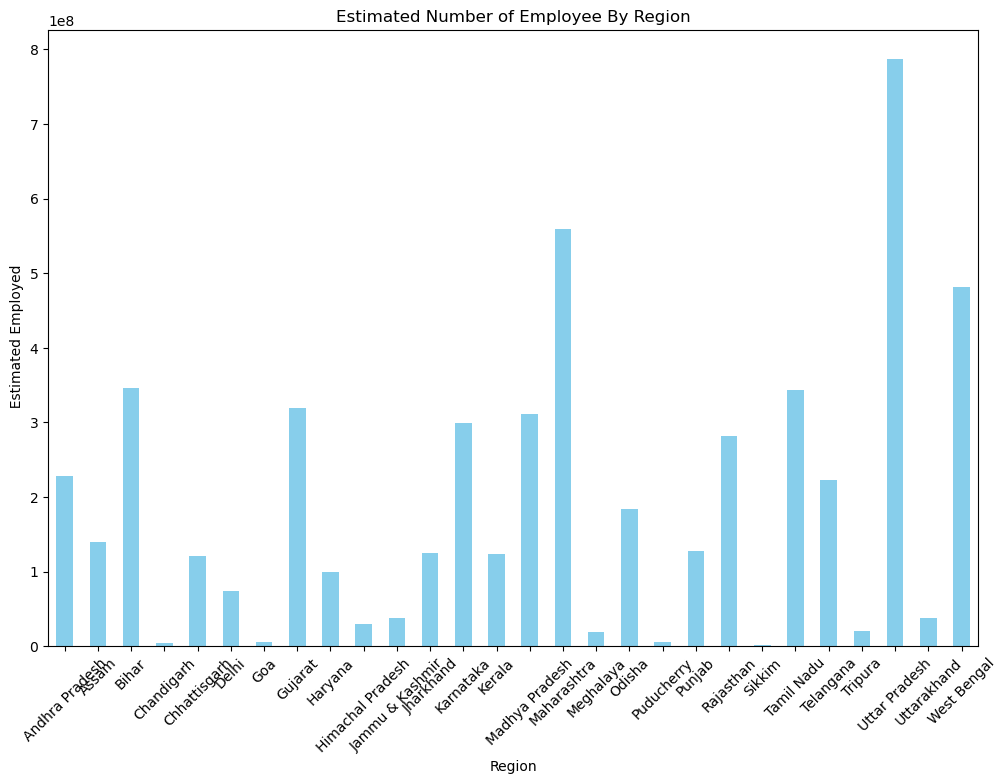

In [149]:
 # Create the bar plot
plt.figure(figsize=(12, 8))
employees_per_region.plot(kind='bar', color='skyblue')
plt.xlabel('Region')
plt.ylabel('  Estimated Employed ')
plt.title('Estimated Number of Employee By Region')
plt.xticks(rotation=45)
plt.show()